In [1]:
from init_plot import *

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-17 22:19:58.534516: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



-------------------------func_help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache, p_pdf
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    get_adata_umap
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



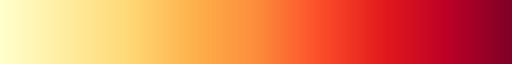

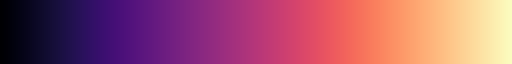

In [2]:
item = 'RA'
show_legend = False

model = 'csMAHN'
if sys.argv[1] == 'True':
    model = sys.argv[2]
assert model in 'Seurat,came,csMAHN,SAMap'.split(
    ','), '[Error] Invalid modle "{}"'.format(model)

df_para = pd.read_csv(p_cache.joinpath(
    'parameter_{}.csv'.format(item)
))
df_para['path_ref'] = df_para['path_ref'].apply(
    lambda x: p_cache.joinpath(x))
df_para['path_que'] = df_para['path_que'].apply(
    lambda x: p_cache.joinpath(x))


display(cm, cm_2)

# get res info

In [3]:
df = get_test_result_df(p_res)
df = df.query("tissue == 'RA'")
_temp = df.apply(
    lambda row: '{model}'.format(
        **row), axis=1)
assert _temp.is_unique, '[isnot unique]'
df.index = _temp
del _temp

display(df)
# for _i, _row in df.iterrows():
#     show_umap(_row)


[extract]
^(?P<tissue>.+)_(?P<sp_ref>.+)-corss-(?P<sp_que>.+);(?P<model>came|csMAHN|Seurat|SAMap);(?P<name_ref>[\w-]+)-map-(?P<name_que>[[\w-]+);?(?P<resdir_tag>.+)?$


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/pandas/core/strings/accessor.py:2738: FutureWarning: Possible nested set at position 127
  regex = re.compile(pat, flags=flags)


,dir,name,tissue,sp_ref,sp_que,model,name_ref,name_que,resdir_tag
Seurat,/public/workspace/licanchengup/link/res_publis...,RA_h-corss-m;Seurat;RAhfib-map-RAmfib;is_1v1=True,RA,h,m,Seurat,RAhfib,RAmfib,is_1v1=True
csMAHN,/public/workspace/licanchengup/link/res_publis...,RA_h-corss-m;csMAHN;RAhfib-map-RAmfib;epochs=3...,RA,h,m,csMAHN,RAhfib,RAmfib,epochs=300;is_1v1=False
SAMap,/public/workspace/licanchengup/link/res_publis...,RA_h-corss-m;SAMap;RAhfib-map-RAmfib;is_1v1=False,RA,h,m,SAMap,RAhfib,RAmfib,is_1v1=False
came,/public/workspace/licanchengup/link/res_publis...,RA_h-corss-m;came;RAhfib-map-RAmfib;epochs=300...,RA,h,m,came,RAhfib,RAmfib,epochs=300;is_1v1=False


# pdf
## plot_parameter

In [4]:
row = df.loc[model, :]
ppara_adata_umap = get_adata_umap(row, False)

# show_color_map(_temp)
with Block("ppara_color_map['cell_type_all']"):
    _temp = get_color_map(range(ppara_adata_umap\
        .obs['true_label'].unique().size))
    ppara_color_map['cell_type_all'] = {
        _k: _v for _k,
        _v in zip(
            'intermediate,perivascular,sublining,HLA-DRA hi sublining,\
DKK3 + sublining,lining,CD34+ sublining'.split(','),
            _temp.values())}
    ppara_color_map['cell_type_all'] = {
        _k: ppara_color_map['cell_type_all'][_k]
        for _k in 'lining,CD34+ sublining,HLA-DRA hi sublining,\
DKK3 + sublining,sublining,intermediate,perivascular'.split(',')
    }
with Block("ppara_color_map['cell_type']"):
    ppara_color_map['cell_type'] = {_k: ppara_color_map['cell_type_all'][_k]
                                      for _k in 'CD34+ sublining,HLA-DRA hi sublining,\
DKK3 + sublining,lining'.split(',')}
# show_color_map(ppara_color_map['cell_type'])

show_dict_key(ppara_color_map,'ppara_color_map')


>ppara_color_map['']------------------------------------------------------
	cell_type
	cell_type_all


In [5]:
def df_cumsum(df, keys, suffix='bottom'):
    for key in keys:
        # _plot['{}_{}'.format(key,suffix)] =  np.cumsum(_plot[key])
        df['{}_{}'.format(key, suffix)] = np.concatenate(
            (np.repeat(0, 1), np.cumsum(df[key])[:-1]))
    return df

with Block("ppara_data order"):
    ppara_data.update({
        'order_h_cell_type':list(ppara_color_map['cell_type'].keys()),
        'order_m_cell_type':'lining,sublining,intermediate,perivascular'.split(','),
        'order_m_lable':'Healthy WT,Healthy KO-Notch3,RA WT,RA KO-Notch3,RA WT ISO,RA WT anti-NRR3'.split(',')
    })

with Block("ppara_data['marker']"):
    ppara_data['marker'] = loads(
        p_plot.joinpath(
            'data/RA',
            'violin_gene_RA.json').read_text())

with Block("ppara_data['hbar'] ; _plot for next Block"):
    _plot = ppara_adata_umap.obs.query("dataset_type == 'que'").copy()
    _plot['label'] = df_apply_merge_field(
        _plot, '{preobs_status} {preobs_label}')
    _plot = _plot.loc[:, [
        _ for _ in _plot.columns if not _.startswith('preobs_')]]
    _plot = pd.merge(
        group_agg(_plot, 'label,pre_label'.split(','), {'pre_label': ['count']}),
        _plot['label'].value_counts().to_frame('label_count').reset_index(),
        on='label', how='outer'
    )
    _plot['ratio'] = _plot.eval("pre_label_count/label_count")
    _plot = _plot.pivot(
        index='label', columns='pre_label', values='ratio'
    )
    
    _plot = _plot.loc[
        ppara_data['order_m_lable'],
        ppara_data['order_h_cell_type']
    ]
    ppara_data['hbar'] = _plot.copy().transpose()
    ppara_data['hbar'] = df_cumsum(ppara_data['hbar'], ppara_data['hbar'].columns)

with Block("ppara_data['hbar_each_ct']"):
    _plot['color'] = [
        cm_2(i) for i in np.linspace(.1, .8, _plot.index.size)]
    _plot['color_text'] = 'grey,grey,black,black,black,black'.split(
        ',')
    ppara_data['hbar_each_ct'] = _plot
    del _plot
    
show_dict_key(ppara_data,'ppara_data')


>ppara_data['']-----------------------------------------------------------
	hbar
	hbar_each_ct
	key_scpl_show_genes
	marker
	order_h_cell_type
	order_m_cell_type
	order_m_lable


## ppara_plot_function_custom

In [6]:

with Block("ppara_plot_function_custom['hbar']"):
    def _func(df_plot, ax):
        _keys = 'Healthy WT,Healthy KO-Notch3,RA WT,RA KO-Notch3,RA WT ISO,RA WT anti-NRR3'.split(
            ',')
        for _i, _row in df_plot.iterrows():
            ax.barh(y=1+np.arange(len(_keys)),
                    width=[_row[_k] for _k in _keys],
                    height=.6,
                    left=[_row['{}_bottom'.format(_k)] for _k in _keys],
                    color=ppara_color_map['cell_type'][_row.name],
                    alpha=.8,
                    label=_row.name)
        ax.tick_params('both', which='both', length=0, width=0)
        ax.set_xlim(0, 1)
        ax.set_xticks(np.linspace(0, 1, 6), ['{:.0f}%'.format(
            i*100) for i in np.linspace(0, 1, 6)], **fontdict_default)
        ax.set_yticks(
            1 +
            np.arange(
                len(_keys)),
            _keys,
            rotation=0,
            **fontdict_default)
        ax.set_ylim(.4, 6.6)
        # ax.set_frame_on(False)
        ax.set_title('Fibroblast', fontdict=fontdict_default)
    
    ppara_plot_function_custom['hbar'] = _func

with Block("ppara_plot_function_custom['hbar_sub_fib']"):
    def _func(df_plot, ax, sub_fib='HLA-DRA hi sublining'):
        def _optimize_text_loc_x(ax, value, ratio=0.1):
            loc_min, loc_max = ax.get_xlim()
            offset = (loc_max-loc_min)*ratio
            res = value - offset
            res = max(res, loc_min + offset)
            res = min(res, loc_max - offset)
            return res
    
        def _get_tick(v):
            res = np.array([0, 1])
            for cutoff, res_cutoff in zip([np.round(_*.2, decimals=1) for _ in np.arange(5, 1-1, -1)],
                                          [np.linspace(0, np.round(_*.2, decimals=1), _+1)
                                           for _ in np.arange(5, 1-1, -1)]):
                if v >= cutoff:
                    res = res_cutoff
                    break
            return res
    
        _keys = 'Healthy WT,Healthy KO-Notch3,RA WT,RA KO-Notch3,RA WT ISO,RA WT anti-NRR3'.split(
            ',')
        ax.barh(y=1 + np.arange(df_plot[sub_fib].size),
                height=.75,
                width=df_plot[sub_fib],
                color=df_plot['color']
                )
        for _text, _y, _c in zip(
                df_plot[sub_fib],
                1 + np.arange(df_plot[sub_fib].size),
                df_plot['color_text']):
            ax.text(
                _optimize_text_loc_x(ax, _text, 0.15), _y-0.2,
                '{:.1f}%'.format(_text*100), color=_c)
        ax.tick_params('both', which='both', length=0, width=0)
        # ax.set_xticks(
        #         ax.get_xticks(),
        #         ['{:.1f}%'.format(_) for _ in 100*ax.get_xticks()],
        #         **fontdict_default)
    
        ax.set_xticks(_get_tick(max(ax.get_xlim())), ['{:.1f}%'.format(
            _) for _ in _get_tick(max(ax.get_xlim()))], **fontdict_default)
        ax.set_yticks(1+np.arange(len(_keys)),
                      df_plot.index.to_list(), **fontdict_default)
        ax.set_ylim(.4, 6.6)
        ax.set_title(sub_fib, fontdict=fontdict_default)
    
    ppara_plot_function_custom['hbar_sub_fib'] = _func

with Block("ppara_plot_function_custom['violin_gene']"):
    def _func(
            adata,
            gene,
            ax,
            key_groupby='label',
            groupby_order=ppara_data['order_m_lable'],
            del_yticks=True):
        def _get_tick(v):
            res = np.array([0, 1])
            for cutoff, res_cutoff in zip([10, 7.5, 5, 2.5],
                                          [np.linspace(0, 10, 4+1), np.linspace(0, 7.5, 3+1),
                                           np.linspace(0, 5, 2+1), np.linspace(0, 2, 2+1)]):
                if v > cutoff:
                    res = res_cutoff
                    break
            return res
    
        df_plot = sc.get.obs_df(
            adata, [
                key_groupby, gene]).query(
            "`{}` > 0".format(gene))
        df_plot[key_groupby] = df_plot[key_groupby].astype(str)
        df_plot = df_plot.sort_values(key_groupby, key=lambda s: s.map(
            {_: i for i, (_) in enumerate(groupby_order)}), ascending=True)
        sns.violinplot(df_plot, x=gene, y=key_groupby,  orient="y",
                       fill=False, ax=ax, hue=key_groupby,
                       palette=[cm_2(i) for i in np.linspace(.1, .8, len(groupby_order))],
                       linewidth=.75,
                       inner_kws=dict(box_width=2, whis_width=.75)
                       )
        ax.set_ylabel(''), ax.set_xlabel('')
    
        if del_yticks:
            ax.set_yticks([], [],
                          **fontdict_default)
        else:
            ax.set_yticks(ax.get_yticks(),
                          [_.get_text() for _ in ax.get_yticklabels()],
                          **fontdict_default)
        _ = _get_tick(max(ax.get_xlim()))
        ax.set_xticks(_, _.astype(str),
                      **fontdict_default)
        ax.set_xmargin(0.1)
        ax.set_ylim(0-.6, len(groupby_order) - .4)
        ax.set_ymargin(0.2)
        ax.set_title(gene, fontdict=fontdict_default)

    ppara_plot_function_custom['violin_gene'] = _func

with Block("ppara_plot_function_custom['violin_gene_with_stats']"):
    def _func(
            adata,
            gene,
            ax,
            key_groupby='label',
            groupby_order=ppara_data['order_m_lable'],
            del_yticks=True):
        def _get_df_plot(adata,gene,key_groupby,groupby_order):
            df_plot = sc.get.obs_df(
                adata, [
                    key_groupby, gene]).query(
                "`{}` > 0".format(gene))
            df_plot[key_groupby] = df_plot[key_groupby].astype(str)
            df_plot = df_plot.sort_values(key_groupby, key=lambda s: s.map(
                {_: i for i, (_) in enumerate(groupby_order)}), ascending=True)
            return df_plot
        def _get_df_stats(df_plot,key_groupby,gene,test_pairs):
            df_stats = multiple_test(
                df_plot,key_groupby=key_groupby,key_value=gene,
                test_pairs=test_pairs,test_func=stats.mannwhitneyu,
                    test_func_kwarg={
                        'alternative': 'two-sided'},
                    fd_method='bh'
            )
            
            # 后处理
            df_stats['marker'] = df_stats['padj'].apply(
                lambda x: get_significance_marker(x))
            df_stats['color'] = df_stats['mean_diff'].apply(
                lambda x: 'red' if x > 0 else 'blue').mask(
                df_stats['padj'] > 0.05, 'grey')
            df_stats['y'] = np.array([1,2,5])
            return df_stats
        def _get_tick(v):
            res = np.array([0, 1])
            for cutoff, res_cutoff in zip([10, 7.5, 5, 2.5],
                                          [np.linspace(0, 10, 4+1), np.linspace(0, 7.5, 3+1),
                                           np.linspace(0, 5, 2+1), np.linspace(0, 2, 2+1)]):
                if v > cutoff:
                    res = res_cutoff
                    break
            return res
    
        df_plot = _get_df_plot(adata,gene,key_groupby,groupby_order)
        df_stats = _get_df_stats(df_plot,key_groupby,gene,test_pairs=[
            'Healthy WT,Healthy WT,RA WT ISO'.split(','),
            'Healthy KO-Notch3,RA WT,RA WT anti-NRR3'.split(',')])
        sns.violinplot(df_plot, x=gene, y=key_groupby,  orient="y",
                   fill=False, ax=ax, hue=key_groupby,
                   palette=[cm_2(i) for i in np.linspace(.1, .8, len(groupby_order))],
                   linewidth=.75,
                   inner_kws=dict(box_width=2, whis_width=.75)
                   )
        ax.set_ylabel(''), ax.set_xlabel('')
        
        if del_yticks:
            ax.set_yticks([], [],
                          **fontdict_default)
        else:
            ax.set_yticks(ax.get_yticks(),
                          [_.get_text() for _ in ax.get_yticklabels()],
                          **fontdict_default)
        _ = _get_tick(max(ax.get_xlim()))
        ax.set_xticks(_, _.astype(str),
                      **fontdict_default)
        ax.set_xmargin(0.1)
        ax.set_ylim(0-.6, len(groupby_order) - .4)
        ax.set_ymargin(0.2)
        ax.set_title(gene, fontdict=fontdict_default)
        # add significance_marker
        df_stats['x'] = max(ax.get_xlim())*.85
        for _i, _row in df_stats.iterrows():
            ax.text(_row['x'], _row['y'], _row['marker'],
                    color=_row['color'], fontdict=fontdict_default)
        return df_plot,df_stats
    ppara_plot_function_custom['violin_gene_with_stats'] = _func
    
del _func

show_dict_key(ppara_plot_function_custom,'ppara_plot_function_custom')


>ppara_plot_function_custom['']-------------------------------------------
	hbar
	hbar_sub_fib
	heatmap_gene
	heatmap_gene_get_marker_and_df_plot
	heatmap_gene_process_multi_marker_and_df_plot
	violin_gene
	violin_gene_with_stats


In [7]:
with Block("adata_ref and adata_que"):
    adata_ref = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_ref']),
        ppara_adata_umap.obs)
    adata_ref.obs['true_label'] = pd.Categorical(
        adata_ref.obs['true_label'],
        ppara_color_map['cell_type'].keys())
    adata_que = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_que']),
        ppara_adata_umap.obs)
    adata_que.obs['pre_label'] = pd.Categorical(
        adata_que.obs['pre_label'],
        ppara_color_map['cell_type'].keys())
    adata_ref.obsm['X_umap'] = adata_ref.obs.loc[:,
                                                 'preobs_x,preobs_y'.split(',')].to_numpy()
    adata_que.obsm['X_umap'] = adata_que.obs.loc[:,
                                                 'preobs_UMAP1,preobs_UMAP2'.split(',')].to_numpy()
    
    adata_que.obs['label'] = df_apply_merge_field(
        adata_que.obs, "{preobs_status} {preobs_label}")

## plot

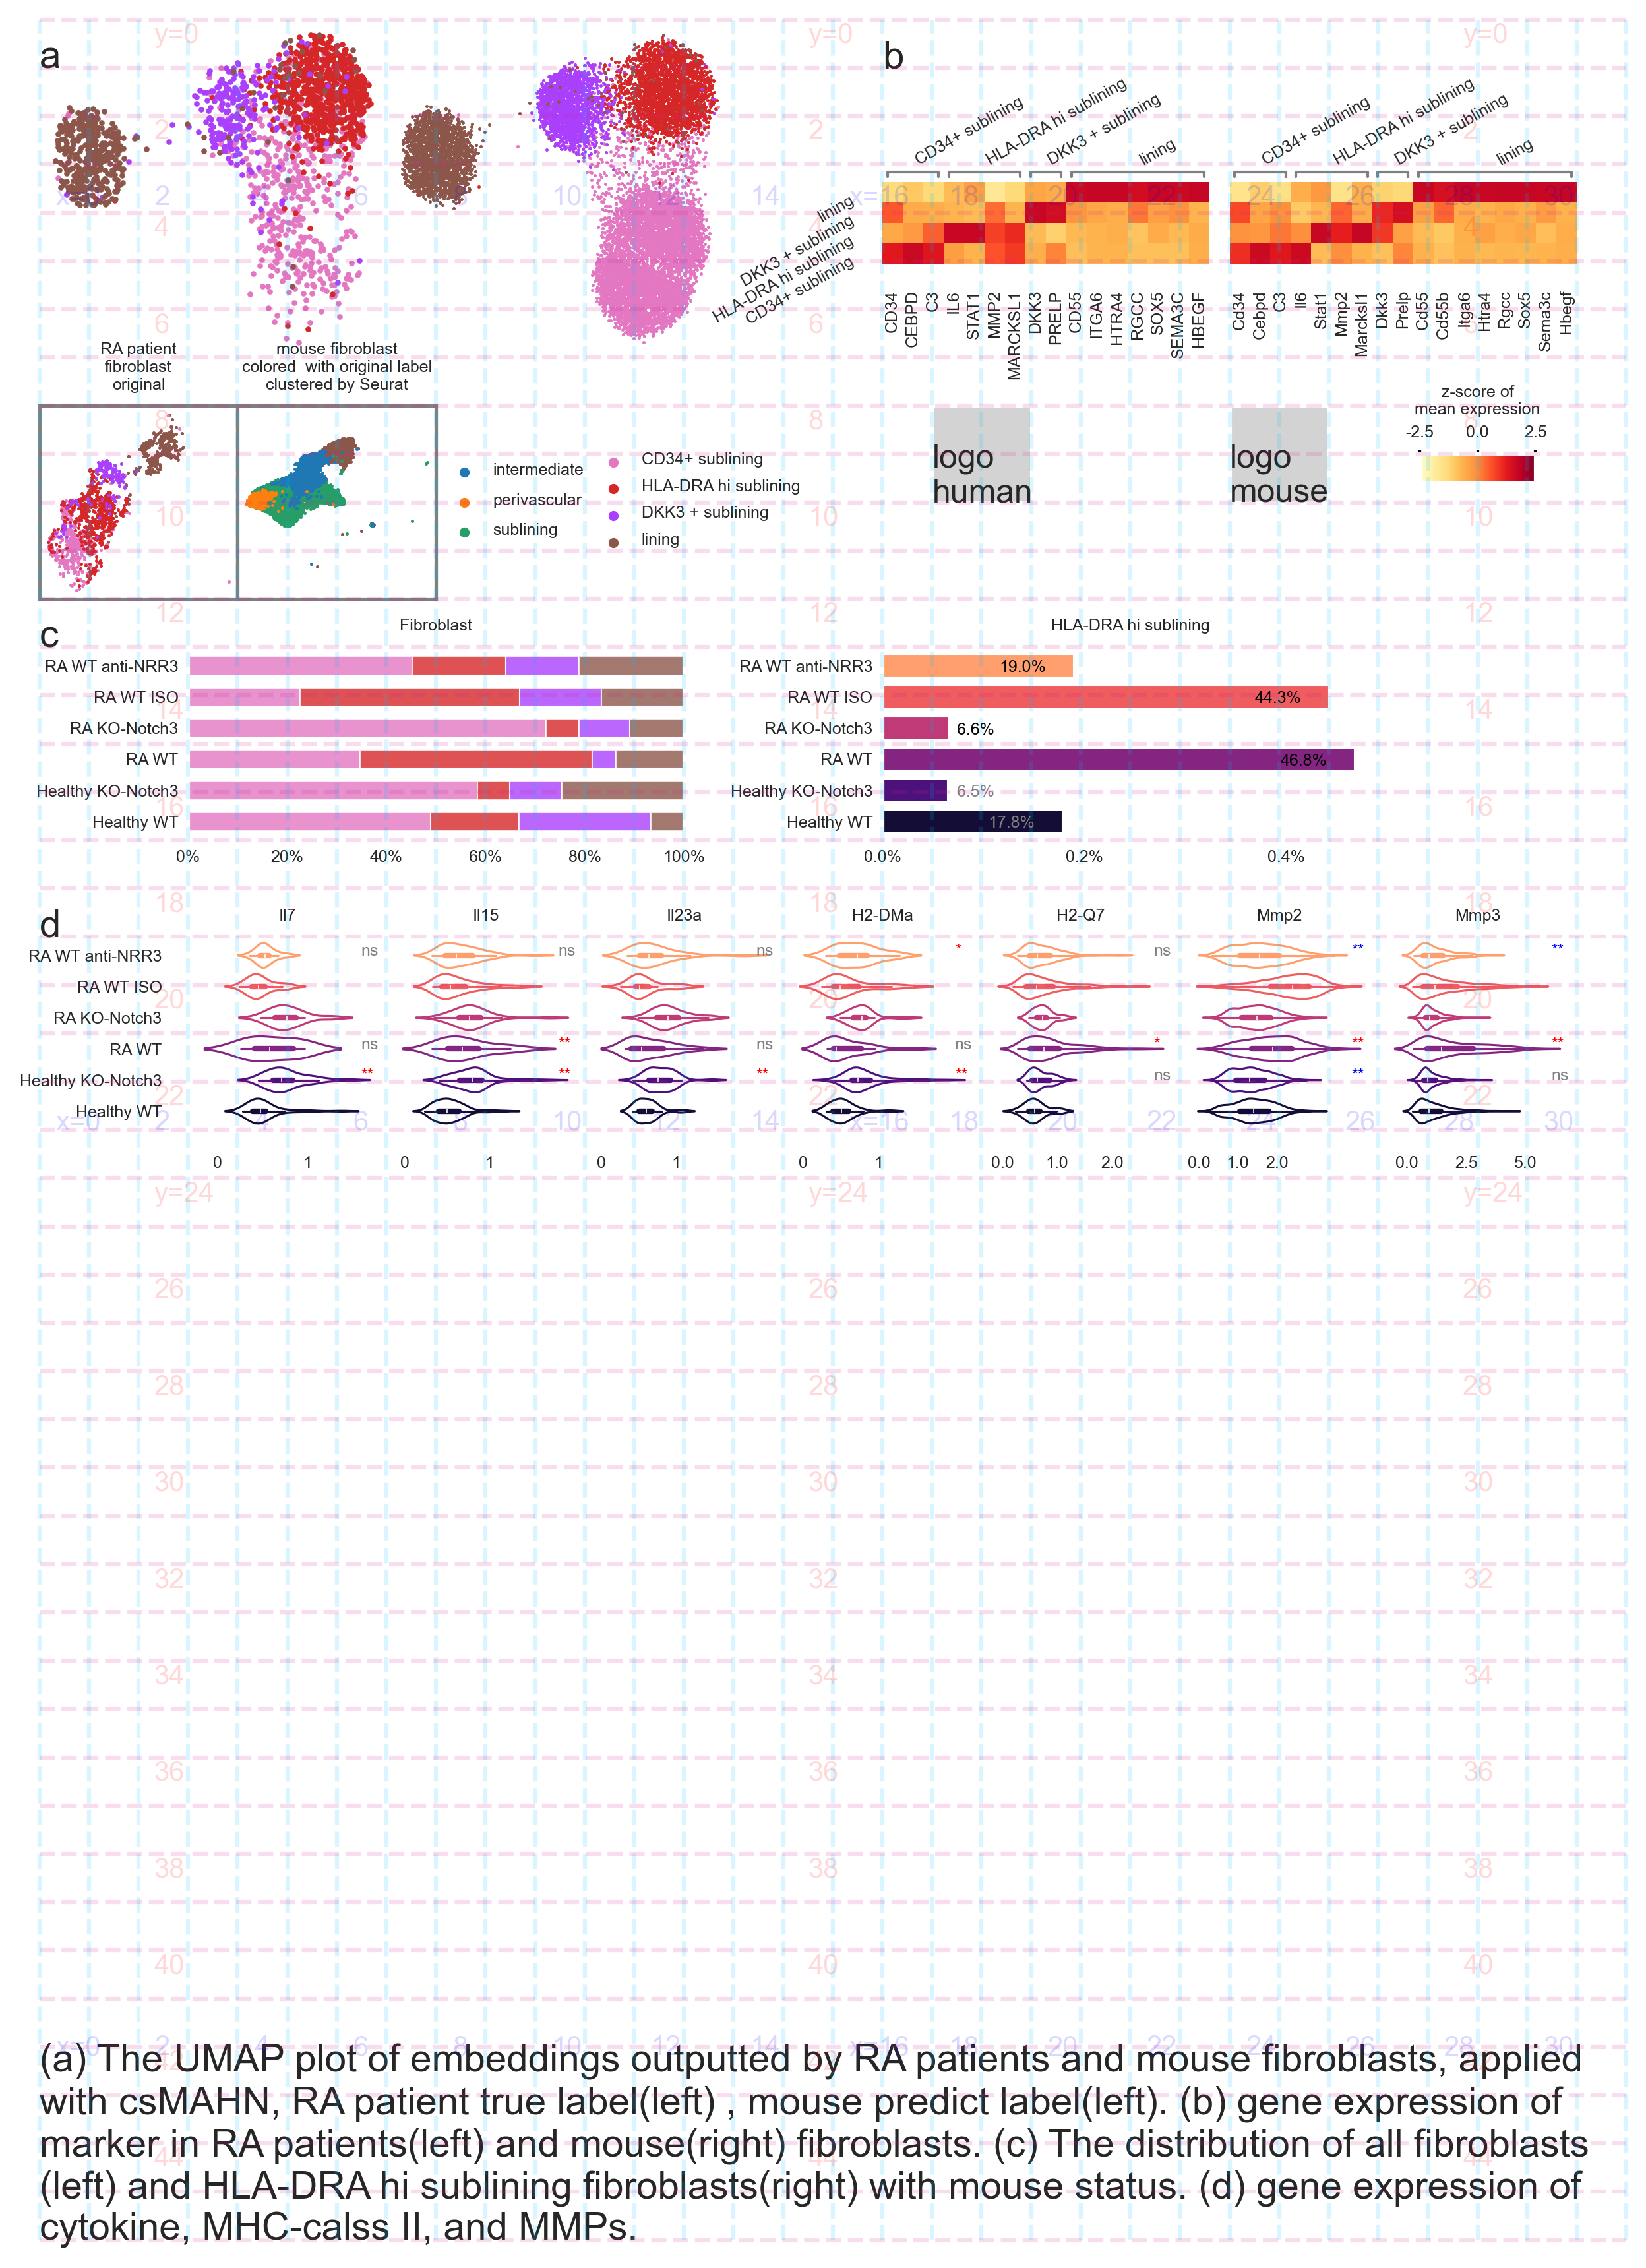

In [8]:
fig = plt.figure(figsize=(8.27, 11.69))
spec = fig.add_gridspec(nrows=46, ncols=32,
                        left=0.03, right=1,  # 设置边距
                        bottom=0.02, top=0.98,  # 设置边距
                        wspace=0, hspace=0)  # 设置子图间距
# UMAP ----------------------------------------
with Block("UMAP"):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 0, 7, 7)
    plot_umap(
        subset_adata(ppara_adata_umap, 'dataset_type', ['ref']),
        'true_label', ppara_color_map['cell_type'], ax=ax, size=10,
        show_legend=False)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 7, 0, 7, 7)
    plot_umap(subset_adata(ppara_adata_umap, 'dataset_type', ['que']),
              'pre_label', ppara_color_map['cell_type'], ax=ax,
              size=2, show_legend=False)
    with mpl.rc_context({'axes.facecolor': 'white', 'axes.edgecolor': 'grey'}):
        ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 8, 4, 4)
        plot_umap(
            adata_ref,
            'true_label',
            ppara_color_map['cell_type_all'],
            ax=ax,
            size=2,
            show_legend=False)
        ax.set_title('RA patient\nfibroblast\noriginal',
                     fontdict=fontdict_default)
        ax.set_axis_on(), ax.set_yticks([], []), ax.set_xticks([], [])
        ax = plt_pdf_add_ax_with_spec(fig, spec, 4, 8, 4, 4)
        plot_umap(
            adata_que,
            'true_label',
            ppara_color_map['cell_type_all'],
            ax=ax,
            size=2,
            show_legend=False)
        ax.set_title(
            'mouse fibroblast\ncolored  with original label\nclustered by Seurat',
            fontdict=fontdict_default)
        ax.set_axis_on(), ax.set_yticks([], []), ax.set_xticks([], [])
    
    ax.set_ymargin(.25)
with Block("UMAP legend"):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 11, 9, 2, 2)
    show_color_map(
        ppara_color_map['cell_type'],ax=ax)
    ax.set_ymargin(.1)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 8, 9, 2, 2)
    show_color_map(
        {_k: ppara_color_map['cell_type_all'][_k]
         for _k in 'intermediate,perivascular,sublining'.split(',')},
        ax=ax)
    ax.set_ymargin(.3)

# marker ----------------------------------------
with Block("marker"):
    _temp = []
    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            adata_ref,
            'true_label',
            ppara_data['marker']['ref']))
    
    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            adata_que,
            'pre_label',
            ppara_data['marker']['que']))
    
    df_marker, df_plot = ppara_plot_function_custom[
        'heatmap_gene_process_multi_marker_and_df_plot'](_temp)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 17, 1, 14, 6)
    _fontdict = fontdict_default.copy()
    _fontdict.update({'rotation':30,
        'verticalalignment':'bottom',
        'horizontalalignment':'left'})
    ppara_plot_function_custom['heatmap_gene'](df_plot, df_marker, ax,
            cbar=False,kv_line_text=_fontdict)

    _fontdict = fontdict_default.copy()
    _fontdict.update({'rotation':30,
        'verticalalignment':'top',
        'horizontalalignment':'right'})
    ax.set_yticks(ax.get_yticks(),
        [_.get_text() for _ in ax.get_yticklabels()],
        **_fontdict
    
)
with Block("marker colorbar"):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 26, 9, 6, 4)
    _axesimage = ax.imshow([[-2.5, 2.5], [0, 1]], vmax=2.5, vmin=-2.5, cmap=cm)
    _colorbar = fig.colorbar(_axesimage, ax=ax,
                             location='top', orientation='horizontal',
                             shrink=.5,
                             aspect=4,  # colorbar 长宽比
                             label='z-score of\nmean expression'
                             )
    _colorbar.set_label('z-score of\nmean expression', **fontdict_default)
    _colorbar.ax.tick_params('both', width=1, length=1.5, color='black')
    _colorbar.set_ticks(_colorbar.get_ticks(),
                        # _colorbar.get_ticks().astype(str),
                        labels=list(_colorbar.get_ticks().astype(str)),
                        **fontdict_default)
    fig.delaxes(ax)

with Block("logo"):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 18, 8, 2, 2)
    ax.text(0, 0, 'logo\nhuman', fontdict={'fontsize': 12})
    ax.set_facecolor('#D3D3D3'), ax.set_xticks([], []), ax.set_yticks([], [])
    ax = plt_pdf_add_ax_with_spec(fig, spec, 24, 8, 2, 2)
    ax.text(0, 0, 'logo\nmouse', fontdict={'fontsize': 12})
    ax.set_facecolor('#D3D3D3'), ax.set_xticks([], []), ax.set_yticks([], [])

with Block("hbar"):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 3, 13, 10, 4)
    ppara_plot_function_custom['hbar'](ppara_data['hbar'], ax)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 17, 13, 10, 4)
    ppara_plot_function_custom['hbar_sub_fib'](
        ppara_data['hbar_each_ct'], ax, sub_fib='HLA-DRA hi sublining')

with Block("gene"):
    for _i, (_gene) in enumerate(
            # 'Il7,Il15,Tgfb2,H2-Ab1,H2-D1,Mmp2,Mmp14'.split(',')
            'Il7,Il15,Il23a,H2-DMa,H2-Q7,Mmp2,Mmp3'.split(',')
            ):
        ax = plt_pdf_add_ax_with_spec(fig, spec, _i*4+3, 19, 4, 4)
        ppara_plot_function_custom['violin_gene_with_stats'](
            adata_que, _gene, ax, del_yticks=_i > 0)

with Block("text"):
    for _text, _x, _y in zip(
        'a,b,c,d'.split(','),
        [int(_) for _ in '0,17,0,0'.split(',')],
            [int(_) for _ in '1,1,13,19'.split(',')]):
        plt_pdf_add_text_with_ax(
            plt_pdf_add_ax_with_spec(
                fig, spec, _x, _y), _text)
with Block("note"):
    _text = """(a) The UMAP plot of embeddings outputted by RA patients and mouse fibroblasts, applied
with csMAHN, RA patient true label(left) , mouse predict label(left). (b) gene expression of
marker in RA patients(left) and mouse(right) fibroblasts. (c) The distribution of all fibroblasts
(left) and HLA-DRA hi sublining fibroblasts(right) with mouse status. (d) gene expression of
cytokine, MHC-calss II, and MMPs."""
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 45, 42)
    plt_pdf_add_text_with_ax(ax, _text, 0, 0)

# save ----------------------------------------
# with PdfPages('ouput.pdf') as pdf:
with PdfPages(p_pdf.joinpath('{}_{}_1.pdf'.format(item, model))) as pdf:
    pdf.savefig(fig)
    plt.close('all')
fig.savefig(Path(pdf._filename).with_suffix('.svg'))
plt_pdf_add_grid_customer(fig)  # 添加网格
display(fig)

# pdf_supp

In [9]:
with Block("ppara_plot_function_custom['heatmap']"):
    def _func(df_plot, ax, cmap=cm, fontdict_tick=fontdict_default,
              fontdict_axes_title=fontdict_axes_title):
        sns.heatmap(df_plot,
                    square=True, cmap='Blues', cbar=False, ax=ax)
        _text = df_plot.index
        ax.set_yticks(
            np.arange(len(_text)) + .5, _text, **fontdict_tick
        )
        _text = df_plot.columns
        ax.set_xticks(
            np.arange(len(_text)) + .5, _text, **fontdict_tick
        )
        ax.set_ylabel(df_plot.index.name, fontdict=fontdict_axes_title)
        ax.set_xlabel(df_plot.columns.name, fontdict=fontdict_axes_title)
    ppara_plot_function_custom['heatmap'] = _func
with Block("ppara_plot_function_custom['heatmap_enrich']"):
    def _func(
            df_plot,
            ax,
            yticks_right=False,
            xticks_top=False,
            del_xticks=False,
            vmax=5E-2, vmin=0,
            cbar=True,
            cbar_kws=None):
        ax = sns.heatmap(df_plot, annot_kws=fontdict_default, cmap=cm_2, ax=ax,
                         square=True, vmax=vmax, vmin=vmin, cbar=cbar,
                         cbar_kws=cbar_kws)
        ax.set_ylabel('')
        ax.tick_params('both', width=0, length=0)
        ax.yaxis.tick_right() if yticks_right else None
        ax.set_yticks(ax.get_yticks(),
                      [_.get_text() for _ in ax.get_yticklabels()], **{
            'fontfamily': ['arial'], 'fontsize': 4.0, 'fontweight': 'normal',
            'rotation': 'horizontal'
        })
        if del_xticks:
            ax.set_xticks([], [])
        else:
            ax.xaxis.tick_top() if xticks_top else None
            ax.set_xticks(ax.get_xticks(),
                          [_.get_text() for _ in ax.get_xticklabels()],
                          **{'fontfamily': ['arial'],
                             'fontsize': 6.0,
                             'fontweight': 'normal',
                             'rotation': 'horizontal'})
    
    
    ppara_plot_function_custom['heatmap_enrich'] = _func
    del _func

with Block("ppara_data['hm_confusion_matrix_true']"):
    _data = ppara_adata_umap.obs
    _data = group_agg(_data,'sp,true_label'.split(','),rename_dict={
        'sp':'species',
        'true_label':'original label',
        'true_label_count':'count'})
    _data = _data.pivot(index = 'original label',columns='species',values='count')
    _data = _data.loc[ppara_color_map['cell_type_all'].keys(),:]
    
    ppara_data['hm_confusion_matrix_true'] = _data
with Block("ppara_data['m_confusion_matrix_true_pre']"):
        _data = ppara_adata_umap.obs.query("dataset_type == 'que'")
        _data = group_agg(_data,'true_label,pre_label'.split(','),rename_dict={
            'true_label':'original label',
            'pre_label':'predict label',
            'pre_label_count':'count'})
        _data = _data.pivot(index = 'original label',columns='predict label',values='count')
        _data = _data.fillna(0).loc[
            ppara_data['order_m_cell_type'],
            ppara_data['order_h_cell_type']
        ]
        ppara_data['m_confusion_matrix_true_pre'] = _data
        ppara_data['m_confusion_matrix_true_pre_zscore'] = stats.zscore(_data, axis=1)

with Block("EnrichmentAnalysis"):
    if not p_plot.joinpath(
            'data/EnrichmentAnalysis/RA_que_pre_HLA-DRA hi sublining').exists():
        sc.tl.rank_genes_groups(
            adata_que,
            groupby='pre_label',
            method='wilcoxon')
        _df_rank_gene = sc.get.rank_genes_groups_df(
            adata_que, group=['HLA-DRA hi sublining'])\
            .query("pvals_adj <0.01 & logfoldchanges > 1.5")
        print('[Enrich] {} genes'.format(_df_rank_gene.shape[0]))
        EnrichmentAnalysis_run_with_r(
            'RA_que_pre_HLA-DRA hi sublining',
            'm2.cp',
            ','.join(
                _df_rank_gene['names']))
with Block("ppara_data['enrich_df_F2']"):
    _df_enr_res = EnrichmentAnalysis_get_res_df()\
        .filter(regex='RA_que_pre', axis=0)
    _data = EnrichmentAnalysis_get_adj(
        _df_enr_res.loc['RA_que_pre_HLA-DRA hi sublining', :])
    _data.shape
    _data.index = _data.index.to_series()\
        .apply(str_next_line, s_find='_', index=20)
    _data = _data.rename(columns={
        'RA_que_pre_HLA-DRA hi sublining': 'HLA-DRA hi sublining'
    })
    
    ppara_data['enrich_df_F2'] = _data


In [10]:
for _,_2 in zip([ppara_color_map,ppara_data,ppara_plot_function_custom],
'ppara_color_map,ppara_data,ppara_plot_function_custom'.split(',')):
    show_dict_key(_,_2)


>ppara_color_map['']------------------------------------------------------
	cell_type
	cell_type_all

>ppara_data['']-----------------------------------------------------------
	enrich_df_F2
	hbar
	hbar_each_ct
	hm_confusion_matrix_true
	key_scpl_show_genes
	m_confusion_matrix_true_pre
	m_confusion_matrix_true_pre_zscore
	marker
	order_h_cell_type
	order_m_cell_type
	order_m_lable

>ppara_plot_function_custom['']-------------------------------------------
	hbar
	hbar_sub_fib
	heatmap
	heatmap_enrich
	heatmap_gene
	heatmap_gene_get_marker_and_df_plot
	heatmap_gene_process_multi_marker_and_df_plot
	violin_gene
	violin_gene_with_stats


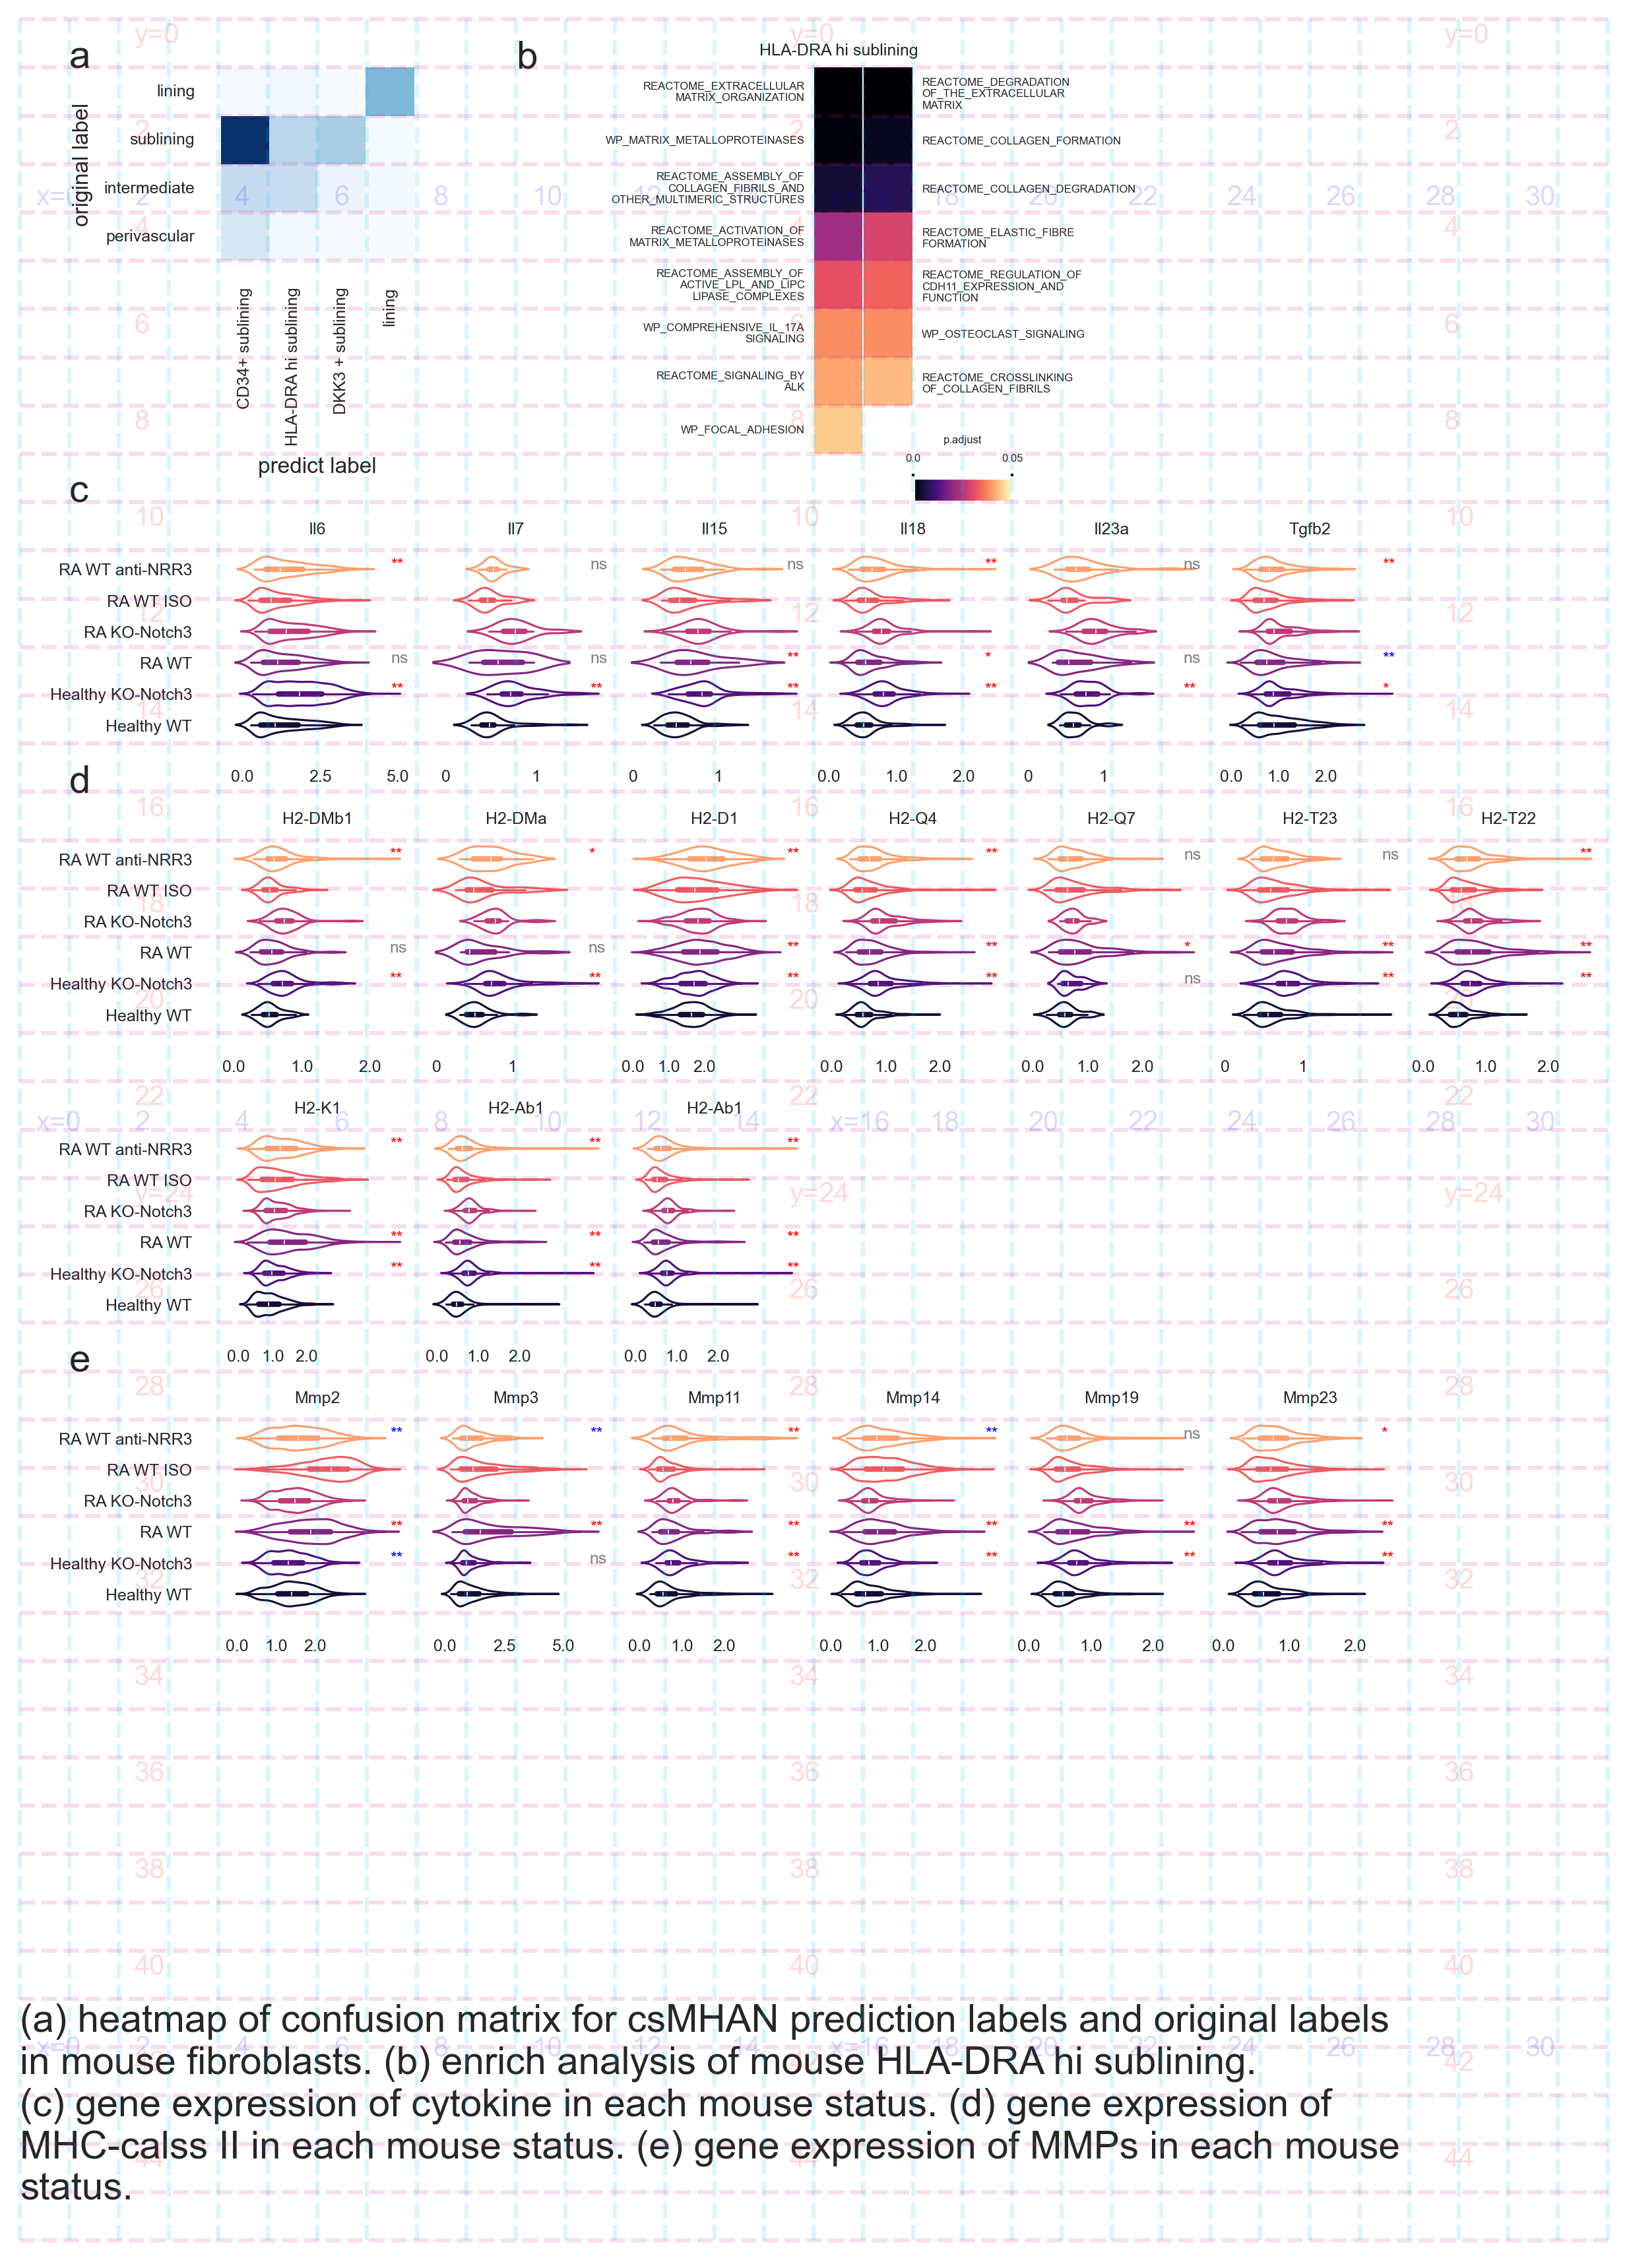

In [11]:
fig = plt.figure(figsize=(8.27, 11.69))
spec = fig.add_gridspec(nrows=46, ncols=32,
                        left=0.03, right=1,  # 设置边距
                        bottom=0.02, top=0.98,  # 设置边距
                        wspace=0, hspace=0)  # 设置子图间距
# heatmap ----------------------------------------
ax = plt_pdf_add_ax_with_spec(fig,spec,4,1,4,4)
ppara_plot_function_custom['heatmap'](
    ppara_data['m_confusion_matrix_true_pre'],
    ax=ax)

# gene ----------------------------------------
with Block('cytokine'):
    for _i, (_gene) in enumerate(
            'Il6,Il7,Il15,Il18,Il23a,Tgfb2'.split(',')):
        _i_row, _i_col = _i//7, _i % 7
        ax = plt_pdf_add_ax_with_spec(
            fig, spec, _i_col*4+4, 11+_i_row*6, 4, 4)
        ppara_plot_function_custom['violin_gene_with_stats'](
            adata_que, _gene, ax, del_yticks=_i_col > 0)
with Block('MHC-calss II'):
    for _i, (_gene) in enumerate(
            'H2-DMb1,H2-DMa,H2-D1,H2-Q4,H2-Q7,H2-T23,H2-T22,H2-K1,H2-Ab1,H2-Ab1'.split(',')):
        _i_row, _i_col = _i//7+1, _i % 7
        ax = plt_pdf_add_ax_with_spec(
            fig, spec, _i_col*4+4, 11+_i_row*6, 4, 4)
        ppara_plot_function_custom['violin_gene_with_stats'](
            adata_que, _gene, ax, del_yticks=_i_col > 0)
with Block('MMPs'):
    for _i, (_gene) in enumerate(
            'Mmp2,Mmp3,Mmp11,Mmp14,Mmp19,Mmp23'.split(',')):
        _i_row, _i_col = _i//7+3, _i % 7
        ax = plt_pdf_add_ax_with_spec(
            fig, spec, _i_col*4+4, 11+_i_row*6, 4, 4)
        ppara_plot_function_custom['violin_gene_with_stats'](
            adata_que, _gene, ax, del_yticks=_i_col > 0)
# enrich ----------------------------------------
with Block('enrich'):
    vmax, vmin = 5E-2, 0
    # ax = plt_pdf_add_ax_with_spec(fig, spec, 6, 26, 1, 8)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 16, 1, 1, 8)
    ppara_plot_function_custom['heatmap_enrich'](
        ppara_data['enrich_df_F2'].iloc[0::2, :], ax,
        vmax=vmax, vmin=vmin,xticks_top=True, cbar=False)
    # ax = plt_pdf_add_ax_with_spec(fig, spec, 7, 26, 1, 7)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 17,1, 1, 7)
    ppara_plot_function_custom['heatmap_enrich'](
        ppara_data['enrich_df_F2'].iloc[1::2, :], ax,
        vmax=vmax, vmin=vmin,yticks_right=True, del_xticks=True, cbar=False)
    with Block('enrich color_bar'):
        ax = plt_pdf_add_ax_with_spec(fig, spec, 18, 8, 2, 2)
        _axesimage = ax.imshow([[vmax, vmin], [vmin, vmax]],
                               vmax=vmax, vmin=vmin, cmap=cm_2)
        _colorbar = fig.colorbar(_axesimage, ax=ax,
                                 location='top', orientation='horizontal',
                                 shrink=1, fraction=1,
                                 aspect=4,  # colorbar 长宽比
                                 label='z-score of\nmean expression'
                                 )
        _fontdict = {
            'fontfamily': ['arial'],
            'fontsize': 4.0,
            'fontweight': 'normal',
            'rotation': 'horizontal'}
        _colorbar.set_label('p.adjust', **_fontdict)
        _colorbar.ax.tick_params(
            'both', width=1, length=1.5, color='black')
        _colorbar.set_ticks(_colorbar.get_ticks(),
                            # _colorbar.get_ticks().astype(str),
                            labels=list(_colorbar.get_ticks().astype(str)),
                            **_fontdict)
        fig.delaxes(ax)

with Block("text"):
    for _text, _x, _y in zip(
        'a,b,c,d,e'.split(','),
        [int(_) for _ in '1,10,1,1,1'.split(',')],
            [int(_) for _ in '1,1,10,16,28'.split(',')]):
        plt_pdf_add_text_with_ax(
            plt_pdf_add_ax_with_spec(
                fig, spec, _x, _y), _text)

with Block("note"):
    _text = """
(a) heatmap of confusion matrix for csMHAN prediction labels and original labels
in mouse fibroblasts. (b) enrich analysis of mouse HLA-DRA hi sublining.
(c) gene expression of cytokine in each mouse status. (d) gene expression of 
MHC-calss II in each mouse status. (e) gene expression of MMPs in each mouse 
status.
"""
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 45, 42)
    plt_pdf_add_text_with_ax(ax, _text, 0, 0)


# save ----------------------------------------
# with PdfPages('ouput.pdf') as pdf:
with PdfPages(p_pdf.joinpath('{}_{}_supp_1.pdf'.format(item, model))) as pdf:
    pdf.savefig(fig)
    plt.close('all')


# fig.savefig(Path(pdf._filename).with_suffix('.svg'))
plt_pdf_add_grid_customer(fig)  # 添加网格
# plt_pdf_add_grid_fig_coordinate(fig) # 标出fig的绝对坐标系
display(fig)

# finish

In [12]:
print('\n[finish]\n'.center(100, '-'))

---------------------------------------------
[finish]
---------------------------------------------


# draft

In [13]:
with Block("display confusion_matrix"):
    print('\n> hm_confusion_matrix_true')
    display(
        ppara_data['hm_confusion_matrix_true']\
            .style.highlight_null()\
            .format(precision=0)
    )
    
    print('\n> m_confusion_matrix_true_pre')
    display(
        ppara_data['m_confusion_matrix_true_pre']\
            .style.highlight_null()\
            .background_gradient(axis=1,cmap='bwr')\
            .format(precision=0)
    )


> hm_confusion_matrix_true


species,h,m
original label,,
lining,413,2004
CD34+ sublining,484,nan
HLA-DRA hi sublining,719,nan
DKK3 + sublining,228,nan
sublining,nan,6624
intermediate,nan,2279
perivascular,nan,800



> m_confusion_matrix_true_pre


predict label,CD34+ sublining,HLA-DRA hi sublining,DKK3 + sublining,lining
original label,,,,
lining,55,117,11,1821
sublining,4022,1170,1353,79
intermediate,994,991,209,85
perivascular,644,97,57,2


In [14]:
_data = ppara_data['m_confusion_matrix_true_pre']
for _ in _data.columns:
    print('[ratio]\t{:.3f}\t{}'.format(_data[_].sum()/_data.sum().sum(),_))


[ratio]	0.488	CD34+ sublining
[ratio]	0.203	HLA-DRA hi sublining
[ratio]	0.139	DKK3 + sublining
[ratio]	0.170	lining


In [15]:
show_dict_key(ppara_data,'ppara_data')


>ppara_data['']-----------------------------------------------------------
	enrich_df_F2
	hbar
	hbar_each_ct
	hm_confusion_matrix_true
	key_scpl_show_genes
	m_confusion_matrix_true_pre
	m_confusion_matrix_true_pre_zscore
	marker
	order_h_cell_type
	order_m_cell_type
	order_m_lable
